<br><br><center><h1 style="font-size:2em;color:#2467C0">Uber-Daten aus New York</h1></center>
<br>
<table>
<col width="950">
<col width="450">
<tr>
<td><img src="https://i.pinimg.com/564x/c9/f3/a0/c9f3a0a260b28fc9877b391b30bc54a0.jpg" align="middle" style="width:1050px;height:360px;"/></td>
<td>
Die Datensatz ist von <a href="https://www.kaggle.com">Kaggle</a>.   <a href=" https://www.kaggle.com/joychakraborty2000/uber-new-york-data-analysis">Uber New York Data</a> beschreibt Uber Daten in New York.
<td/>
<br>
</tr>
</table>

<h4 style="font-family:courier;">die Notwendige packete importieren</h4>
<ul>
  <li style="font-family:courier;">pandas:bietet Hilfsmittel für die Verwaltung von Daten und deren Analyse  </li>
  <li style="font-family:courier;">seaborn:bietet eine High-Level-Schnittstelle zum Zeichnen attraktiver und informativer statistischer Grafiken.</li>
  <li style="font-family:courier;">numpy:ermöglicht eine einfache Handhabung von Vektoren, Matrizen oder generell großen mehrdimensionalen Arrays </li>
  <li style="font-family:courier;">matpotlib: urlaubt mathematische Darstellungen aller Art anzufertigen.</li>
  <li style="font-family:courier;">os:bietet Funktionen zur Interaktion mit dem Betriebssystem. </li>
  <li style="font-family:courier;">glob: wird verwendet, um Dateien/Pfadnamen abzurufen,</li>
</ul>
    



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


<h4 style="font-family:courier;">die Datein im ordner anzeigen lassen  </h4>


In [2]:
files = os.listdir(r'C:\Users\khale\OneDrive\Desktop\educx_weiterbildung\Woche4\uber')
files

['.DS_Store',
 'Readme.txt',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

<h4 style="font-family:courier;">Alle csv datein einlesen einzeln dann verketten in eine einzelne DataFrame </h4>


In [3]:
df = pd.concat(map(pd.read_csv, glob.glob(r'C:\Users\khale\OneDrive\Desktop\educx_weiterbildung\Woche4\uber\*.csv')))

<h4 style="font-family:courier;">Ein copy aus der dataframe erstellen damit python nicht jedes mal die datein aus dem Ordner einliest</h4>


In [4]:
df = df.copy()

<h4 style="font-family:courier;">die erste 5 Elemente der Dataframe anzeigen</h4>


In [5]:
df.head()

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512

<h4 style="font-family:courier;">zahlen der zeilen und spalten der Dataframe anzeigen</h4>


In [6]:
df.shape

(4534327, 4)

<h4 style="font-family:courier;">die verschiene types der dataframe anzeigen </h4>


In [7]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

<h4 style="font-family:courier;">rechnen die summer der null stellen in der Dataframe pro spalte</h4>


In [8]:
df.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

<h4 style="font-family:courier;">mit hilfe von seaborn, die null stellen in eine Graphik darstellen</h4>


<AxesSubplot:>

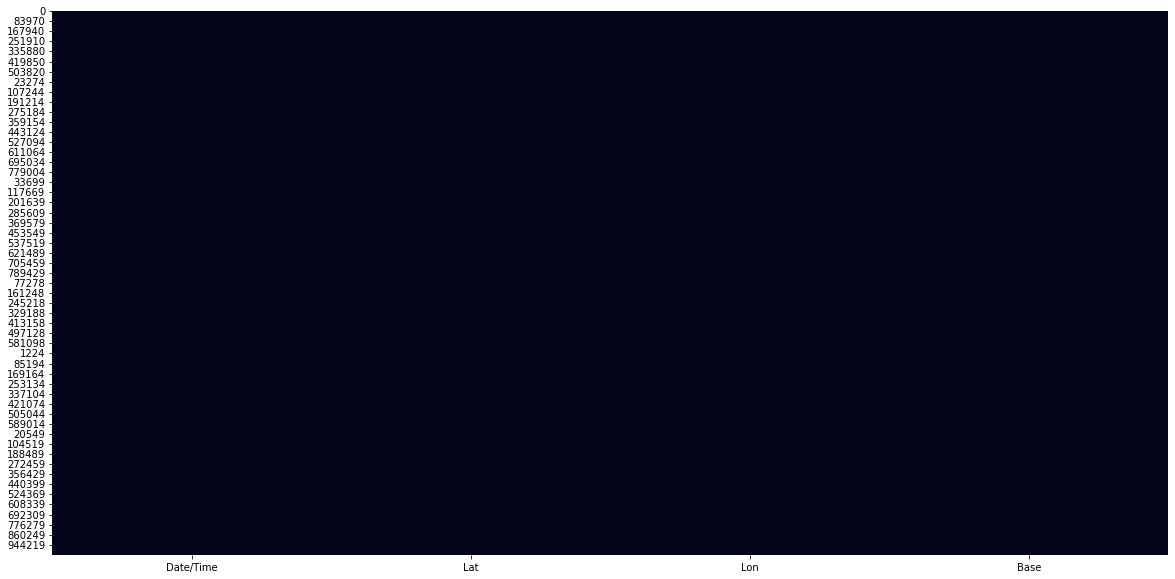

In [9]:
#gucken ob null stellen in der data frame gibt
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

<h4 style="font-family:courier;">die spalte 'Date/time' zu datetime objekt umwandeln</h4>


In [10]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")


<h4 style="font-family:courier;">daten type der Dataframe anzeigen</h4>


In [11]:
# daten type von der frame anzeigen
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 173.0+ MB


<h4 style="font-family:courier;">die erste 5 elemente anzeigen der Dataframe</h4>


In [12]:
df.head()

Date/Time      Lat      Lon    Base
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512

<h4 style="font-family:courier;">date time objekt in tag wochen minute und stunde zerlegen (um die rechnung zu vereinfachen später)</h4>


In [13]:
df['weekday']=df['Date/Time'].dt.day_name()
df['day']=df['Date/Time'].dt.day
df['minute']=df['Date/Time'].dt.minute
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour

<h4 style="font-family:courier;"> die 5 zeilen der Dataframe anzeigen</h4>

In [14]:
df.head()

Date/Time      Lat      Lon    Base  weekday  day  minute  month  \
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512  Tuesday    1      11      4   
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512  Tuesday    1      17      4   
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512  Tuesday    1      21      4   
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512  Tuesday    1      28      4   
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512  Tuesday    1      33      4   

   hour  
0     0  
1     0  
2     0  
3     0  
4     0

<h4 style="font-family:courier;">daten type der neue Dataframe anzeigen</h4>

In [15]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
weekday              object
day                   int64
minute                int64
month                 int64
hour                  int64
dtype: object

<h4 style="font-family:courier;"> die einzelne Elemente der Spalte 'Base' anzeigen </h4>

In [16]:
df['Base'].unique()


array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

<h4 style="font-family:courier;"> die einzelne Elemente der Spalte 'day' anzeigen </h4>

In [17]:
df['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

<h4 style="font-family:courier;"> die einzelne Elemente der Spalte 'weekday' anzeigen </h4>

In [18]:
df['weekday'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

## In Welchen Wochen tag werden taxi am Meinsten benötigt

<h4 style="font-family:courier;"> Dataframe gruppieren nach 'weekday' und zählen pro spalte </h4>

In [19]:
dataPerDayofWeek = df.groupby('weekday').count()

In [20]:
#dataPerDayofWeek.sort_values(by=['weekday'])

<h4 style="font-family:courier;">dictionary erzeugen mit wochentage als keys </h4>


In [21]:
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Sunday': 0,
 'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6}

<h4 style="font-family:courier;"> neue Spalte erstellen die Wochentage zugewisene value nummer enthählt </h4>


In [22]:
dataPerDayofWeek['Day_id'] = dataPerDayofWeek.index
dataPerDayofWeek['Day_id'] = dataPerDayofWeek['Day_id'].map(sorterIndex)
dataPerDayofWeek.head()

Date/Time     Lat     Lon    Base     day  minute   month    hour  \
weekday                                                                       
Friday       741139  741139  741139  741139  741139  741139  741139  741139   
Monday       541472  541472  541472  541472  541472  541472  541472  541472   
Saturday     646114  646114  646114  646114  646114  646114  646114  646114   
Sunday       490180  490180  490180  490180  490180  490180  490180  490180   
Thursday     755145  755145  755145  755145  755145  755145  755145  755145   

          Day_id  
weekday           
Friday         5  
Monday         1  
Saturday       6  
Sunday         0  
Thursday       4

<h4 style="font-family:courier;"> Dataframe sortieren nach 'Day_id'</h4>


In [23]:
dataPerDayofWeek.sort_values('Day_id', inplace=True)
dataPerDayofWeek

Date/Time     Lat     Lon    Base     day  minute   month    hour  \
weekday                                                                        
Sunday        490180  490180  490180  490180  490180  490180  490180  490180   
Monday        541472  541472  541472  541472  541472  541472  541472  541472   
Tuesday       663789  663789  663789  663789  663789  663789  663789  663789   
Wednesday     696488  696488  696488  696488  696488  696488  696488  696488   
Thursday      755145  755145  755145  755145  755145  755145  755145  755145   
Friday        741139  741139  741139  741139  741139  741139  741139  741139   
Saturday      646114  646114  646114  646114  646114  646114  646114  646114   

           Day_id  
weekday            
Sunday          0  
Monday          1  
Tuesday         2  
Wednesday       3  
Thursday        4  
Friday          5  
Saturday        6

<h4 style="font-family:courier;"> die spalte 'Base' anzeigen </h4>


In [24]:
dataPerDayofWeek['Base']

weekday
Sunday       490180
Monday       541472
Tuesday      663789
Wednesday    696488
Thursday     755145
Friday       741139
Saturday     646114
Name: Base, dtype: int64

<h4 style="font-family:courier;"> Säulendiagramm : darstellung von zahl der fahrten pro wochentag </h4>


In [25]:
import plotly.express as px
fig = px.bar(dataPerDayofWeek['Base'],labels={'value':'number of trips'},text_auto='.2s')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Number of Trip per day')

fig.show()
# am donnerstag gibts der meinsten fahrten

## welche uhrzeit werden am meinsten taxi benötigt

<h4 style="font-family:courier;"> die stunden tag zu x und zahl der fahrt pro stundent tag zu y zuweisen </h4>

In [26]:
x= df['hour'].value_counts().index
y = df['hour'].value_counts().values

<h4 style="font-family:courier;"> Säulendiagramm : darstellung von zahl der fahrten pro stundentag </h4>


In [27]:
fig = px.bar(df,x,y,labels={'value':'number of trips'},text_auto='.2s')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Number of Trip per Hour')

fig.show()

#um 17 uhr wird am meinsten taxi benötigt !

## Anzahl der Fahrten pro stunden in jedes Monat

<h4 style="font-family:courier;"> Dataframe monaten position anzeigen  </h4>


In [28]:
for month in df['month'].unique():
    print(month)

4
8
7
6
5
9


In [29]:
 df[df['month']==4]['hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: hour, dtype: int64

<h4 style="font-family:courier;"> in der 4ten monat zahl der fahrten in verschiedene Uhrzeiten </h4>


In [30]:
# in der 4ten monat zahl der fahrten in verschiedene Uhrzeiten
x_ = df[df['month']==4].hour.value_counts().index
y_ = df[df['month']==4].hour.value_counts().values

<h4 style="font-family:courier;"> Seulendiagramm: zahl der fahrten pro stundentag in der 4ten monat </h4>


In [31]:
fig = px.bar(df[df['month']==4],x_,y_,labels={'value':'number of trips'},text_auto='.2s')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Number of Trip per Hour in April')

fig.show()

<h4 style="font-family:courier;">  zahl der fahrten in verschiedene Uhrzeiten im monat April, August,July,juni,May und September </h4>


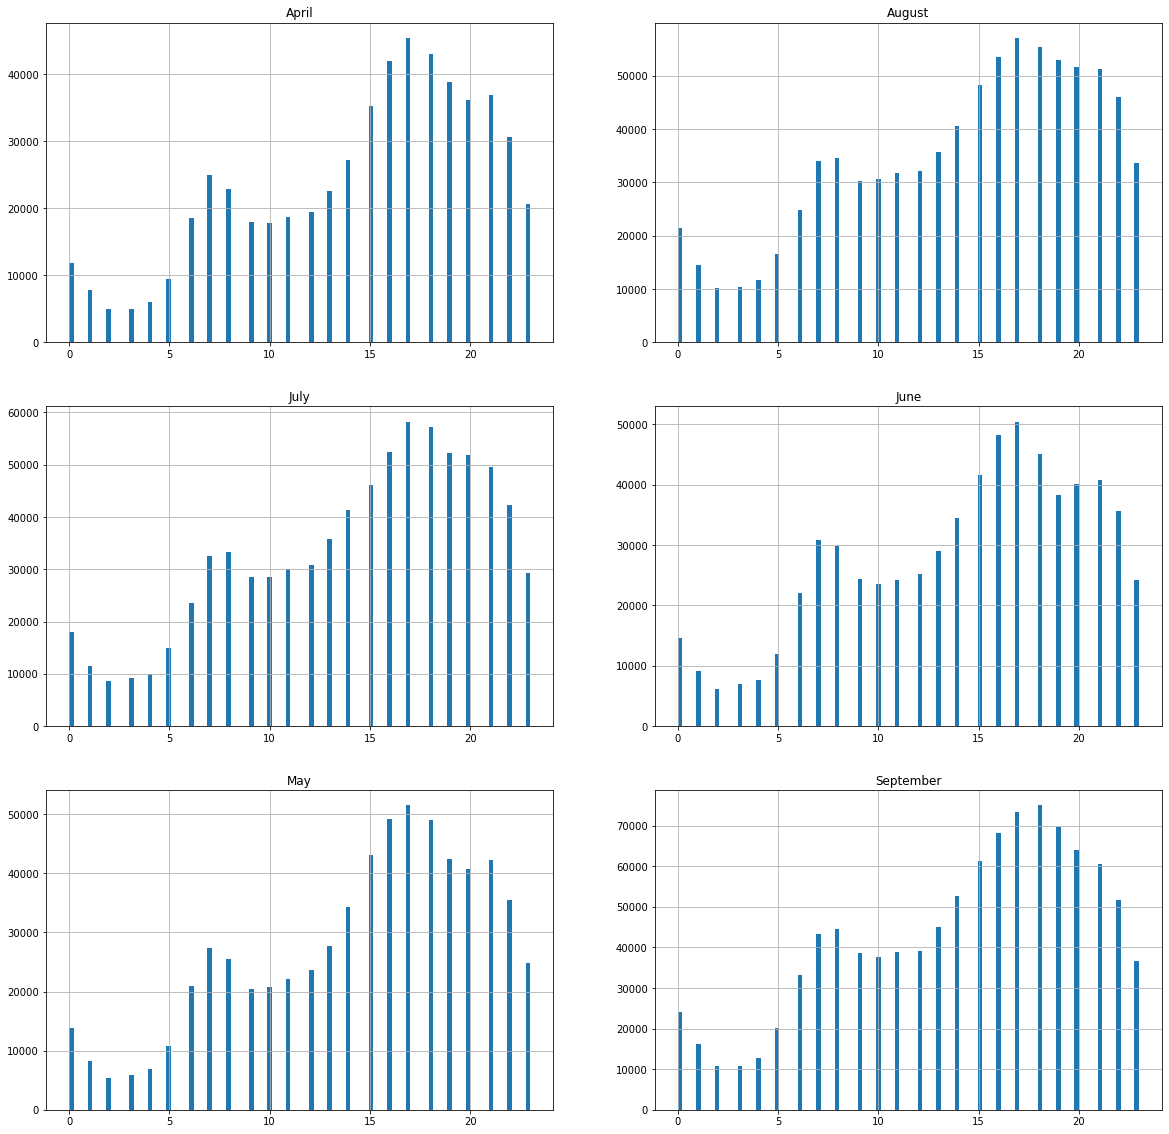

In [32]:

month_ = {	'1':'Janauary',
		'2':'February',
		'3':'March',
		'4':'April',
		'5':'May',
		'6':'June',
		'7':'July',
		'8':'August',
		'9':'September',
		'10':'October',
		'11':'November',
		'12':'December'}
plt.figure(figsize=(20,20))
for i,month in enumerate(df['month'].unique()):
    plt.subplot(3,2,i+1)
    plt.title("{}".format(month_[str(month)]))
    df[df['month']==month]['hour'].hist(bins=100)

## zu welche monat werden die meinsten fahrt benötigt 

In [33]:
dataPermonth = df.groupby('month').count()
dataPermonth

Date/Time      Lat      Lon     Base  weekday      day   minute  \
month                                                                    
4         564516   564516   564516   564516   564516   564516   564516   
5         652435   652435   652435   652435   652435   652435   652435   
6         663844   663844   663844   663844   663844   663844   663844   
7         796121   796121   796121   796121   796121   796121   796121   
8         829275   829275   829275   829275   829275   829275   829275   
9        1028136  1028136  1028136  1028136  1028136  1028136  1028136   

          hour  
month           
4       564516  
5       652435  
6       663844  
7       796121  
8       829275  
9      1028136

<h4 style="font-family:courier;"> monat zahl mit monat string ubennen </h4>


In [34]:
dataPermonth= dataPermonth.rename(index={4:'April',5:'May',6:'June',7:'July',8:'August',9:'September'})

<h4 style="font-family:courier;"> Saulendiagramm: zahl der fahrten pro monat </h4>


In [35]:
import plotly.express as px

fig = px.bar(dataPermonth['Base'],labels={'value':'number of trips'},text_auto='.2s')
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Number of Trip per day')

fig.show()

#september hat die meinsten fahrt ! 

## Zahl der uber pro stunden Wochen tag

In [36]:
df.head()

Date/Time      Lat      Lon    Base  weekday  day  minute  month  \
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512  Tuesday    1      11      4   
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512  Tuesday    1      17      4   
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512  Tuesday    1      21      4   
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512  Tuesday    1      28      4   
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512  Tuesday    1      33      4   

   hour  
0     0  
1     0  
2     0  
3     0  
4     0

<h4 style="font-family:courier;"> data frame nach 'weekday' und 'hour' gruppieren </h4>


In [37]:
df_hour_day = df.groupby(["weekday","hour"]).count().Base


<h4 style="font-family:courier;"> Dataframe nach gruppierung Anzeigen </h4>


In [38]:
df_hour_day.head()

weekday  hour
Friday   0       13716
         1        8163
         2        5350
         3        6930
         4        8806
Name: Base, dtype: int64

<h4 style="font-family:courier;"> Dataframe pivotieren nach index weekday </h4>


In [39]:
pivot = df_hour_day.unstack()
pivot

hour          0      1      2      3     4      5      6      7      8   \
weekday                                                                   
Friday     13716   8163   5350   6930  8806  13450  23412  32061  31509   
Monday      6436   3737   2938   6232  9640  15032  23746  31159  29265   
Saturday   27633  19189  12710   9542  6846   7084   8579  11014  14411   
Sunday     32877  23015  15436  10597  6374   6169   6596   8728  12128   
Thursday    9293   5290   3719   5637  8505  14169  27065  37038  35431   
Tuesday     6237   3509   2571   4494  7548  14241  26872  36599  33934   
Wednesday   7644   4324   3141   4855  7511  13794  26943  36495  33826   

hour          9   ...     14     15     16     17     18     19     20     21  \
weekday           ...                                                           
Friday     25230  ...  36206  43673  48169  51961  54762  49595  43542  48323   
Monday     22197  ...  28157  32744  38770  42023  37000  34159  32849  28925   
Saturday   17669  ...  31418  38769  43512  42844  45883  41098  38714  43826   
Sunday     16401  ...  28151  31112  33038  31521  28291  25948  25076  23967   
Thursday   27812  ...  36699  44442  50560  56704  55825  51907  51990  51953   
Tuesday    25023  ...  34846  41338  48667  55500  50186  44789  44661  39913   
Wednesday  25635  ...  35148  43388  50684  55637  52732  47017  47772  44553   

hour          22     23  
weekday                  
Friday     49409  41260  
Monday     20158  11811  
Saturday   47951  43174  
Sunday     19566  12166  
Thursday   44194  27764  
Tuesday    27712  14869  
Wednesday  32868  18146  

[7 rows x 24 columns]

<h4 style="font-family:courier;"> Heatmap: heufigkeit verteilung der fahrten pro stunde in verchiedene wochentage </h4>


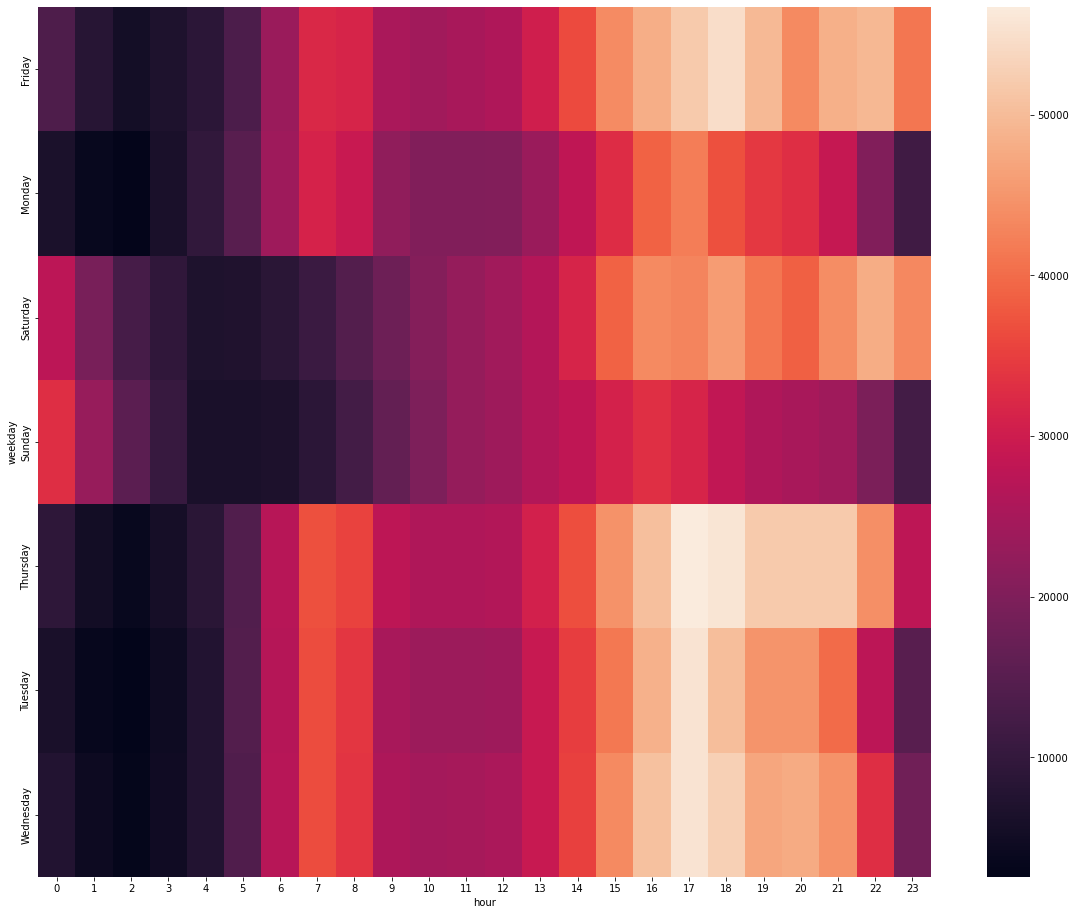

In [49]:
plt.figure(figsize=(20,16))
sns.heatmap(pivot, annot=False);

## Uber Base Analyse


In [40]:
df.head()

Date/Time      Lat      Lon    Base  weekday  day  minute  month  \
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512  Tuesday    1      11      4   
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512  Tuesday    1      17      4   
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512  Tuesday    1      21      4   
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512  Tuesday    1      28      4   
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512  Tuesday    1      33      4   

   hour  
0     0  
1     0  
2     0  
3     0  
4     0

<h4 style="font-family:courier;"> Dataframe gruppieren nach 'Base' und 'mounth' </h4>


In [41]:
base = df.groupby(['Base','month'])['Date/Time'].count().reset_index()
base.tail()

Base  month  Date/Time
25  B02764      5       9504
26  B02764      6       8974
27  B02764      7       8589
28  B02764      8      48591
29  B02764      9     178333

<h4 style="font-family:courier;"> Saulendiagramm : Zahl der fahrten pro 'Base' in verschiedene Monaten </h4>


<AxesSubplot:xlabel='month', ylabel='Date/Time'>

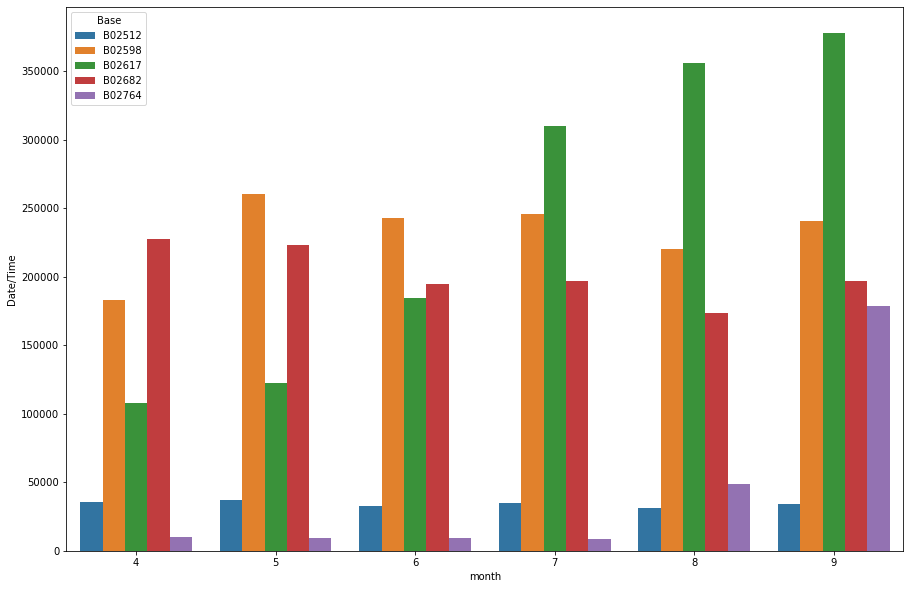

In [54]:
plt.figure(figsize=(15,10))
sns.barplot(x='month',y='Date/Time',hue='Base',data=base)

## Daten Auf der Karte Visualisieren

In [55]:
data = df[['Date/Time','Lat','Lon','Base']]
data.tail()

Date/Time      Lat      Lon    Base
1028131 2014-09-30 22:57:00  40.7668 -73.9845  B02764
1028132 2014-09-30 22:57:00  40.6911 -74.1773  B02764
1028133 2014-09-30 22:58:00  40.8519 -73.9319  B02764
1028134 2014-09-30 22:58:00  40.7081 -74.0066  B02764
1028135 2014-09-30 22:58:00  40.7140 -73.9496  B02764

### aus open street map ! die karte begrenzen

#### 40.66704 , -73.83396 oben links
#### 40.90366, -74.10665 unten recht

In [58]:
dataFiltered = data\
    .where(data.Lat > 40.66704)\
    .where(data.Lat < 40.90366 )\
    .where(data.Lon < -73.83396)\
    .where(data.Lon > -74.10665) 

<h4 style="font-family:courier;"> die gefilterte Dataframe anzeigen </h4>


In [59]:
dataFiltered.head()

Date/Time      Lat      Lon    Base
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512

<h4 style="font-family:courier;"> zahl der gelöschte zeilen berechnen </h4>


In [60]:
print(data.Base.count())
print(dataFiltered.Base.count())
#fast 10% der daten sind gelöscht

4534327
4236494


<h4 style="font-family:courier;"> image aus eine matrix erzeugen zum testen </h4>


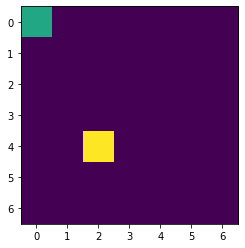

In [62]:
rawImage = [
    [60,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,100,0,0,0,0],
    [0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0]
]
plt.imshow(rawImage)
plt.show()

In [63]:
# Rechts Unten 40.66704 , -73.83396 [0][0]
# Links Oben 40.90366, -74.10665 [6][6]
# 40.8000 , -73.95000 => [3][3]

<h4 style="font-family:courier;"> Test: die position von eine geographische punkt (40.800,-73.95000)  auf die erzeugene coordinaten system berechnen</h4>


In [65]:
#TEST
expLat = 40.80000 #Lat
expLat2 = (expLat - 40.66704)/(40.90366-40.66704)
print(round(expLat2 * 7))

expLon =  -73.95000  # Lon
expLon2 = (expLon + 74.10665 )/(-73.83396 + 74.10665 )
print ( round (expLon2 * 7) )

# ==> diese punkt (pixel liegt an der position (4.4))

4
4


<h4 style="font-family:courier;"> die position von alle geographische punkte aus der Dataframe auf die erzeugene coordinaten system berechnen berechnen </h4>


In [66]:
size = 10
dataFiltered2 = ((dataFiltered.Lat - 40.66704)/(40.90366-40.66704)) * size

In [67]:
dataFiltered2.round()

0          4.0
1          3.0
2          3.0
3          4.0
4          4.0
          ... 
1028131    4.0
1028132    NaN
1028133    8.0
1028134    2.0
1028135    2.0
Name: Lat, Length: 4534327, dtype: float64

In [68]:
dataFiltered_final = dataFiltered[['Lat','Lon']]
dataFiltered_final.Lat= (((dataFiltered_final.Lat - 40.66704)/(40.90366-40.66704)) * size)
dataFiltered_final.Lon = (((dataFiltered_final.Lon + 73.83396)/(-74.10665 + 73.83396 ))*size)

C:\Users\khale\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
dataFiltered_final = dataFiltered_final.round()

In [70]:
dataFiltered_final

Lat  Lon
0        4.0  4.0
1        3.0  7.0
2        3.0  6.0
3        4.0  5.0
4        4.0  5.0
...      ...  ...
1028131  4.0  6.0
1028132  NaN  NaN
1028133  8.0  4.0
1028134  2.0  6.0
1028135  2.0  4.0

[4534327 rows x 2 columns]

<h4 style="font-family:courier;"> data frame gruppieren nach 'Lon' und 'lat' und die heufigkeit pro (Lat,Lon) berechnen </h4>


In [71]:
dataForImage = dataFiltered_final.groupby(['Lat','Lon']).size().reset_index(name="count")
dataForImage

Lat   Lon  count
0     0.0   0.0    255
1     0.0   1.0    625
2     0.0   2.0    887
3     0.0   3.0   2451
4     0.0   4.0  14862
..    ...   ...    ...
115  10.0   6.0     44
116  10.0   7.0     22
117  10.0   8.0     70
118  10.0   9.0     24
119  10.0  10.0      9

[120 rows x 3 columns]

<h4 style="font-family:courier;"> ein bild erzeugen die standart mässig dunkel ist (Array aus dem nullen besteht)</h4>

In [73]:
# ein bild erzeugen die standart mässig dunkel ist (Array aus dem nullen besteht)

img = []
for i in range(0,size + 1):
    imgRow = []
    for j in range (0, size + 1):
        imgRow.append(0)
    img.append(imgRow)

#print(img)


<h4 style="font-family:courier;"> bild arrays mit der heufigkeit verteilung von der Lon und Lan erzetsen </h4>

In [75]:
for i in range(len(dataForImage)):
    img[size - int(dataForImage.loc[i,"Lat"])][size - int(dataForImage.loc[i,"Lon"])] = math.log(dataForImage.loc[i,"count"])

<h4 style="font-family:courier;"> um das ergebniss bessere zu verstehen, heatmap wird  mit der heufigkeit verteilung der geographische coordinaten erzeugt</h4>

In [76]:
img_np = np.array(img)
#img_np

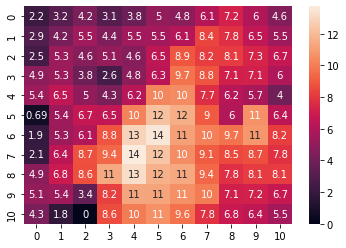

<Figure size 2160x1080 with 0 Axes>

In [78]:
hm = sns.heatmap(data=img_np,annot=True)
plt.figure(figsize=(30,15))  
plt.show()

<h4 style="font-family:courier;"> heufigkeit verteilung der coordinaten system matrix als bild anzeigen</h4>

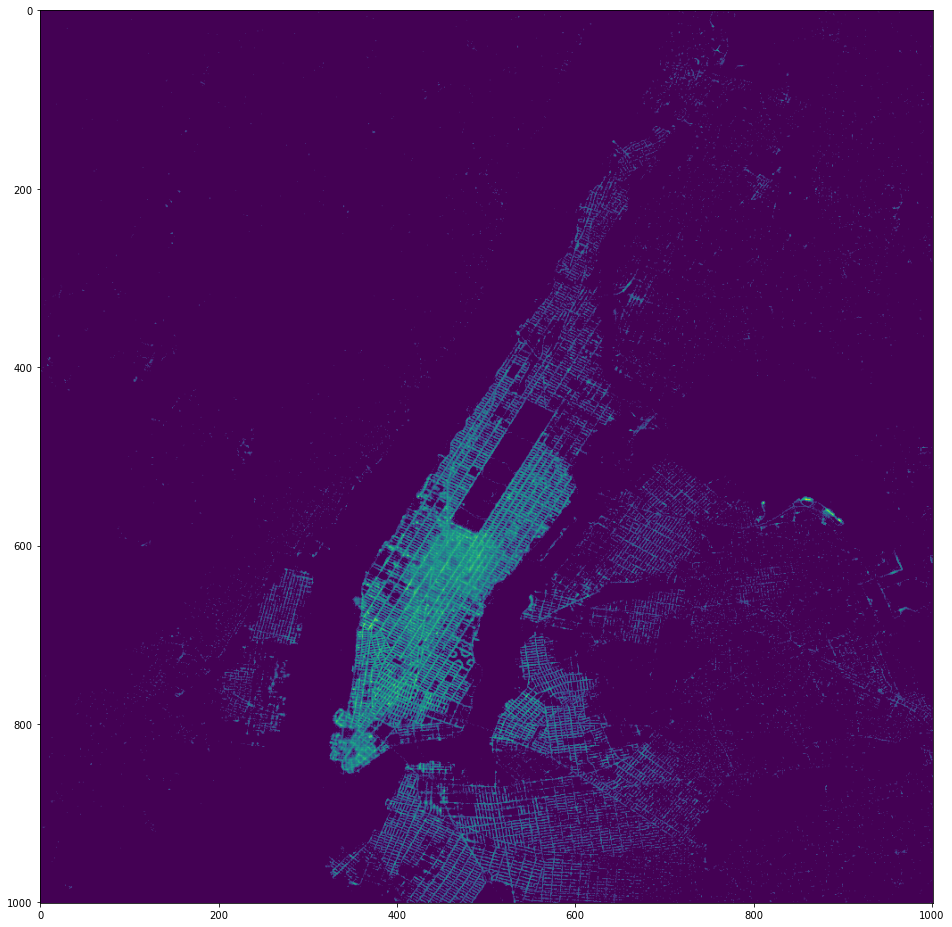

In [479]:

plt.figure(figsize=(16,25))
plt.imshow(img)
plt.show()

In [79]:
!pip install pandoc

  Created wheel for pandoc: filename=pandoc-2.1-py3-none-any.whl size=29536 sha256=f3e73b0bf21f4e0406a4738e7fb2c6f321f4ee28898a1e3adfffa4a9f0c6c385
  Stored in directory: c:\users\khale\appdata\local\pip\cache\wheels\20\e3\a0\b21b97b236e86bfc68e8cfa4baba1a854212cb06772de592d9
Successfully built pandoc


In [80]:
!pip install nbconvert


<h2 style="font-family:courier;">This is a heading</h2>
